In [35]:
from prophet import Prophet
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from torch import nn
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [39]:
#  Read a small portion of the full dataset to practice
PracticeDataFrame = pd.read_csv('reimplementationdata.csv')
PracticeDataFrame = PracticeDataFrame.drop(columns=['Unnamed: 0'])

print(PracticeDataFrame.tail)
# Create a list of all the predictors
predictors_list = list(PracticeDataFrame.columns)
predictors_list.remove('loadConsumption')


# Create a dataframe just for prophet
PracticeDataFrame_prophet =  PracticeDataFrame[['ds','loadConsumption']] 

# loadConsumption is the target and column renamed to y
PracticeDataFrame_prophet = PracticeDataFrame_prophet.rename(columns={'loadConsumption': 'y'})

# Create a list of all the columns to select, which are the target prediction values
# PracticeDataFrame_prophet.head(5)






<bound method NDFrame.tail of               yhat                   ds         trend        daily  \
0     11435.607099  2011-12-01 00:00:00  11343.836985 -2220.323822   
1     10819.006061  2011-12-01 01:00:00  11343.835079 -2982.938999   
2     10357.252145  2011-12-01 02:00:00  11343.833174 -3534.285350   
3     10080.882468  2011-12-01 03:00:00  11343.831269 -3850.574971   
4     10112.458750  2011-12-01 04:00:00  11343.829364 -3834.083722   
...            ...                  ...           ...          ...   
8778  14499.380622  2012-11-30 19:00:00  11327.111564  1553.248605   
8779  14064.378433  2012-11-30 20:00:00  11327.109659  1198.850972   
8780  13470.460845  2012-11-30 21:00:00  11327.107754   585.103168   
8781  12720.752628  2012-11-30 22:00:00  11327.105849  -285.495497   
8782  11851.633314  2012-11-30 23:00:00  11327.103943 -1280.861720   

          weekly      yearly  train  dailyMeanWindspeed-60days  NAO-60days  \
0     540.026028  550.925674  False                

20:52:42 - cmdstanpy - INFO - Chain [1] start processing


                    ds        y
0  2011-12-01 00:00:00  10965.0
1  2011-12-01 01:00:00  10242.0
2  2011-12-01 02:00:00   9933.0
3  2011-12-01 03:00:00   9850.0
4  2011-12-01 04:00:00   9907.0


20:52:43 - cmdstanpy - INFO - Chain [1] done processing


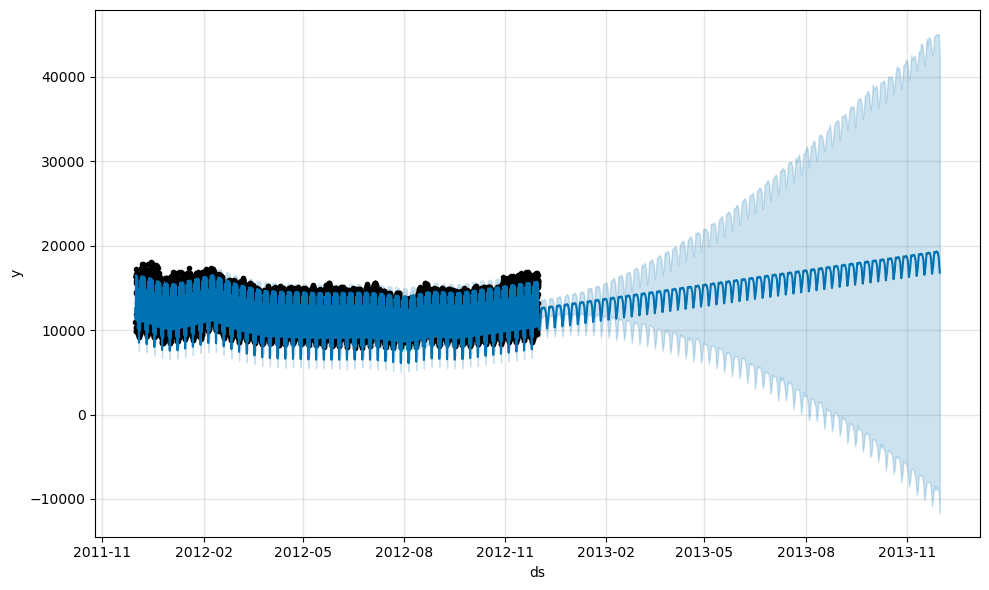

In [31]:

# predict with prophet
print(PracticeDataFrame_prophet.head(5))
model = Prophet(
        daily_seasonality=True,
    )

model = model.fit(PracticeDataFrame_prophet)

future = model.make_future_dataframe(periods=365)
future.tail()

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)





AttributeError: 'DataFrame' object has no attribute 'dim'

In [95]:
#  Read a small portion of the full dataset to practice
PracticeDataFrame = pd.read_csv('reimplementationdata.csv')
PracticeDataFrame = PracticeDataFrame.drop(columns=['Unnamed: 0'])
PracticeDataFrame.set_index('ds', inplace=True)

# Create a list of all the predictors
predictors_list = list(PracticeDataFrame.columns)
predictors_list.remove('loadConsumption')
predictors_list.remove('yhat')
PracticeDataFrame.head(5)

# Create a list of all the columns to select, which are the target prediction values
X =  PracticeDataFrame[predictors_list]

y =  PracticeDataFrame[['loadConsumption','yhat']]

# Scale the data
X_Scaled = StandardScaler().fit_transform(X)
y_Scaled = MinMaxScaler().fit_transform(y)

print(y_Scaled)

[[0.3071205  0.57824331]
 [0.23640454 0.51930491]
 [0.20618153 0.47516771]
 ...
 [0.53139671 0.77274677]
 [0.43789124 0.70108519]
 [0.35641628 0.61800958]]


In [96]:
from torch.autograd import Variable

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y_Scaled, test_size=0.2, random_state=42)


X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 


X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

# class LSTM1(nn.Module):
#     def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
#         super(LSTM1, self).__init__()
#         self.num_classes = num_classes #number of classes
#         self.num_layers = num_layers #number of layers
#         self.input_size = input_size #input size
#         self.hidden_size = hidden_size #hidden state
#         self.seq_length = seq_length #sequence length

#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
#                           num_layers=num_layers, batch_first=True) #lstm
#         self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
#         self.fc = nn.Linear(128, num_classes) #fully connected last layer

#         self.relu = nn.ReLU()
    
#     def forward(self,x):
#         h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
#         c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
#         # Propagate input through LSTM
#         output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
#         hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
#         out = self.relu(hn)
#         out = self.fc_1(out) #first Dense
#         out = self.relu(out) #relu
#         out = self.fc(out) #Final Output
#         return out


import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length, scaler=None):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        self.scaler = scaler  # Store the scaler object

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        self.fc_layers = nn.Sequential(
            nn.Linear(hidden_size, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )
    
    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c_0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn[-1]  # Take the hidden state of the last layer
        out = self.fc_layers(hn)
        return out
    
    def reverse_transform(self, predictions):
        """
        Reverse the scaling of predictions to obtain real values.
        :param predictions: Scaled predictions from the model (numpy array or tensor).
        :return: Real-valued predictions (numpy array).
        """
        if self.scaler is None:
            raise ValueError("Scaler is not provided. Cannot reverse transform predictions.")
        
        # If predictions are a tensor, convert them to a numpy array
        if isinstance(predictions, torch.Tensor):
            predictions = predictions.detach().cpu().numpy()
        
        # Reshape predictions to match the scaler's expected input shape
        predictions = predictions.reshape(-1, self.num_classes)
        
        # Reverse the scaling
        real_values = self.scaler.inverse_transform(predictions)
        return real_values

Training Shape torch.Size([7026, 1, 21]) torch.Size([7026, 2])
Testing Shape torch.Size([1757, 1, 21]) torch.Size([1757, 2])


In [100]:
num_epochs = 1000 #1000 epochs
learning_rate = 0.001 #0.001 lr

input_size = len(predictors_list) #number of featurespredictors_list #number of features
hidden_size = 2 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes 

lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1],scaler=MinMaxScaler()) #our lstm class 
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

In [101]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 100 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

/Users/ruben/anaconda3/lib/python3.12/site-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([7026, 2])) that is different to the input size (torch.Size([7026, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 0.26241
Epoch: 100, loss: 0.04361
Epoch: 200, loss: 0.02651
Epoch: 300, loss: 0.01791
Epoch: 400, loss: 0.01369
Epoch: 500, loss: 0.01157
Epoch: 600, loss: 0.01046
Epoch: 700, loss: 0.00986
Epoch: 800, loss: 0.00956
Epoch: 900, loss: 0.00938


In [103]:
mm = MinMaxScaler()
ss = StandardScaler()



df_X_ss = ss.fit_transform(PracticeDataFrame[predictors_list]) #old transformers
df_y_mm = mm.fit_transform(PracticeDataFrame[['yhat']]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))


train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion

In [104]:
print(data_predict)

[[0.47979057]
 [0.4195463 ]
 [0.3735285 ]
 ...
 [0.7210072 ]
 [0.6353633 ]
 [0.51716495]]


In [105]:
print(PracticeDataFrame.head(5))

                             yhat         trend        daily      weekly  \
ds                                                                         
2011-12-01 00:00:00  11435.607099  11343.836985 -2220.323822  540.026028   
2011-12-01 01:00:00  10819.006061  11343.835079 -2982.938999  530.545171   
2011-12-01 02:00:00  10357.252145  11343.833174 -3534.285350  520.462379   
2011-12-01 03:00:00  10080.882468  11343.831269 -3850.574971  509.880130   
2011-12-01 04:00:00  10112.458750  11343.829364 -3834.083722  498.913521   

                         yearly  train  dailyMeanWindspeed-60days  NAO-60days  \
ds                                                                              
2011-12-01 00:00:00  550.925674  False                        0.9        0.39   
2011-12-01 01:00:00  552.285450  False                        0.9        0.39   
2011-12-01 02:00:00  553.641471  False                        0.9        0.39   
2011-12-01 03:00:00  554.993712  False                        

In [106]:
# Show all dataframe attributes
print(PracticeDataFrame.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8783 entries, 2011-12-01 00:00:00 to 2012-11-30 23:00:00
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   yhat                          8783 non-null   float64
 1   trend                         8783 non-null   float64
 2   daily                         8783 non-null   float64
 3   weekly                        8783 non-null   float64
 4   yearly                        8783 non-null   float64
 5   train                         8783 non-null   bool   
 6   dailyMeanWindspeed-60days     8783 non-null   float64
 7   NAO-60days                    8783 non-null   float64
 8   sic-60days                    8783 non-null   float64
 9   loadConsumption-60days-24h    8783 non-null   float64
 10  loadConsumption-60days-12m    8783 non-null   float64
 11  avgElectricityPrice-60days    8783 non-null   float64
 12  dailyMeanTemperature-60days   8783

In [140]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named `df`
# Separate features and target
df = pd.read_csv('reimplementationdata.csv')
# df = PracticeDataFrame.drop(columns=['Unnamed: 0'])
df.set_index('ds', inplace=True)


import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming your DataFrame is named `df`

# Step 1: Separate features and target
# Exclude 'loadConsumption' and 'yhat' from features
features = df.drop(columns=['loadConsumption', 'yhat'])
target = df['yhat']

print(features.columns)
# Step 2: Split into training and testing sets using the 'train' and 'test' columns
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 3: Scale features and target
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

# Scale features
train_features_scaled = feature_scaler.fit_transform(X_train)
test_features_scaled = feature_scaler.transform(X_test)

# Scale target
train_target_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
test_target_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Step 4: Create sequences for LSTM
def create_sequences(features, target, sequence_length):
    X, y = [], []
    for i in range(len(features) - sequence_length):
        X.append(features[i:i+sequence_length])
        y.append(target[i+sequence_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 60  # Example: Use 60 time steps as input

# Create sequences for training and testing
X_train, y_train = create_sequences(train_features_scaled, train_target_scaled, sequence_length)
X_test, y_test = create_sequences(test_features_scaled, test_target_scaled, sequence_length)

# Convert to PyTorch tensors
import torch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

Index(['Unnamed: 0', 'trend', 'daily', 'weekly', 'yearly', 'train',
       'dailyMeanWindspeed-60days', 'NAO-60days', 'sic-60days',
       'loadConsumption-60days-24h', 'loadConsumption-60days-12m',
       'avgElectricityPrice-60days', 'dailyMeanTemperature-60days',
       'nat-60days', 'winterIndex', 'test', 'loadConsumption-60days-7days',
       'loadConsumption-60days', 'avgGasPrice-60days', 'geopotential-60days',
       'renewableEnergyRatio-60days', 'dailyPrecipitation-60days'],
      dtype='object')


In [141]:
# Initialize the model
input_size = X_train.shape[2]  # Number of features
hidden_size = 50
num_layers = 2
num_classes = 1  # Predicting a single value (loadConsumption)
model = LSTM1(num_classes, input_size, hidden_size, num_layers, sequence_length, scaler=target_scaler)

In [142]:
import torch.optim as optim

# Initialize the model
input_size = X_train.shape[2]  # Number of features
hidden_size = 50
num_layers = 2
num_classes = 1  # Predicting a single value (loadConsumption)
model = LSTM1(num_classes, input_size, hidden_size, num_layers, sequence_length, scaler=target_scaler)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
batch_size = 32

for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        # Get mini-batch
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate on test data
model.eval()
with torch.no_grad():
    test_predictions_scaled = model(X_test)

# Reverse transform predictions
test_predictions = model.reverse_transform(test_predictions_scaled)

# Reverse transform actual target values
test_target_real = target_scaler.inverse_transform(y_test.numpy())

# Compare predictions with actual values
results = pd.DataFrame({
    'Actual': test_target_real.flatten(),
    'Predicted': test_predictions.flatten()
})
print(results.head())

Epoch [1/20], Loss: 0.0400
Epoch [2/20], Loss: 0.0398
Epoch [3/20], Loss: 0.0397
Epoch [4/20], Loss: 0.0397
Epoch [5/20], Loss: 0.0397
Epoch [6/20], Loss: 0.0397
Epoch [7/20], Loss: 0.0398
Epoch [8/20], Loss: 0.0399
Epoch [9/20], Loss: 0.0399
Epoch [10/20], Loss: 0.0400
Epoch [11/20], Loss: 0.0401
Epoch [12/20], Loss: 0.0402
Epoch [13/20], Loss: 0.0402
Epoch [14/20], Loss: 0.0402
Epoch [15/20], Loss: 0.0401
Epoch [16/20], Loss: 0.0401
Epoch [17/20], Loss: 0.0400
Epoch [18/20], Loss: 0.0399
Epoch [19/20], Loss: 0.0398
Epoch [20/20], Loss: 0.0397
         Actual     Predicted
0  11489.447266  11587.856445
1  14661.218750  11487.775391
2   9451.205078  11411.863281
3  11574.546875  11363.345703
4   9244.807617  11331.439453


Using device: cpu
QNode interface: numpy
Epoch [1/5], Loss: 1.692456
Epoch [2/5], Loss: 1.679829
Epoch [3/5], Loss: 1.667251
Epoch [4/5], Loss: 1.654727
Epoch [5/5], Loss: 1.642254


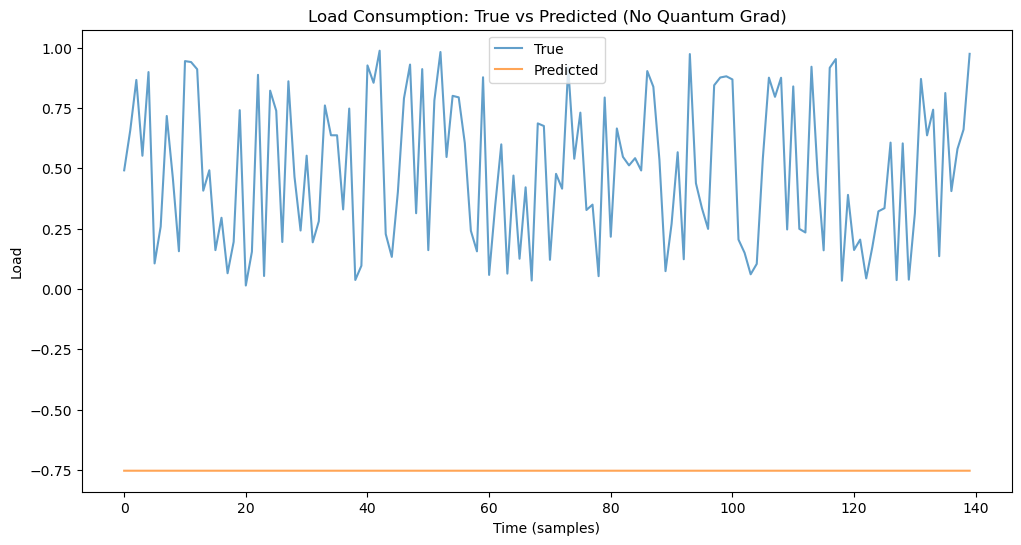

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pennylane as qml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

################################################################################
# 1. DEVICE & PENNYLANE CONFIG
################################################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

num_qubits = 4

dev = qml.device("default.qubit", wires=num_qubits)

# By setting diff_method=None we ensure no gradient will flow
@qml.qnode(dev, interface="torch", diff_method=None)
def quantum_circuit(inputs):
    # We do not do any training or gradient-based updates, so no grad needed.
    for i in range(num_qubits):
        qml.RY(inputs[i], wires=i)
    for i in range(num_qubits - 1):
        qml.CNOT(wires=[i, i+1])
    return [qml.expval(qml.PauliZ(i)) for i in range(num_qubits)]

print("QNode interface:", quantum_circuit.interface)

################################################################################
# 2. QUANTUM LAYER (NO-GRAD)
################################################################################
class QuantumLayer(nn.Module):
    def __init__(self, num_qubits):
        super().__init__()
        self.num_qubits = num_qubits

    def forward(self, x):
        """
        x shape: (batch_size, num_qubits)
        We do not track gradients inside this quantum_circuit call.
        """
        outputs = []
        with torch.no_grad():
            for sample in x:
                # Detach each sample from the grad graph
                sample = sample.detach()
                qc_out = quantum_circuit(sample)
                outputs.append(torch.tensor(qc_out, dtype=torch.float32))
        return torch.stack(outputs)

################################################################################
# 3. HYBRID LSTM MODEL (CLASSICAL PART WILL TRAIN, QUANTUM PART WON'T)
################################################################################
class LSTM1WithQuantum(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 128)
        self.fc2 = nn.Linear(128, num_qubits)
        self.quantum = QuantumLayer(num_qubits)
        self.fc3 = nn.Linear(num_qubits, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.float().to(device)

        h0 = torch.zeros(
            self.lstm.num_layers, x.size(0), self.lstm.hidden_size, 
            dtype=torch.float32, device=device
        )
        c0 = torch.zeros(
            self.lstm.num_layers, x.size(0), self.lstm.hidden_size,
            dtype=torch.float32, device=device
        )

        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]  # last time-step

        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        out = self.quantum(out)  # no gradients flow here
        out = self.fc3(out)      # shape (batch_size, num_classes)

        return out

################################################################################
# 4. DUMMY DATA EXAMPLE
################################################################################
df = pd.DataFrame({
    'feature1': np.random.rand(1000),
    'feature2': np.random.rand(1000),
    'loadConsumption': np.random.rand(1000),
})

features = df.drop(columns=['loadConsumption'])
target = df['loadConsumption']

train_size = int(0.8 * len(df))
train_features = features.iloc[:train_size]
test_features = features.iloc[train_size:]
train_target = target.iloc[:train_size]
test_target = target.iloc[train_size:]

feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_features = feature_scaler.fit_transform(train_features)
test_features = feature_scaler.transform(test_features)
train_target = target_scaler.fit_transform(train_target.values.reshape(-1,1))
test_target = target_scaler.transform(test_target.values.reshape(-1,1))

def create_sequences(feat, targ, seq_length=60):
    X, y = [], []
    for i in range(len(feat) - seq_length):
        X.append(feat[i:i+seq_length])
        y.append(targ[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_features, train_target, seq_length)
X_test, y_test = create_sequences(test_features, test_target, seq_length)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

################################################################################
# 5. MODEL SETUP (NO QUANTUM GRAD)
################################################################################
model = LSTM1WithQuantum(
    num_classes=1,
    input_size=X_train.shape[2],
    hidden_size=50,
    num_layers=2,
    seq_length=seq_length
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

################################################################################
# 6. TRAINING (ENTIRE DATASET PER EPOCH)
################################################################################
epochs = 5
for epoch in range(epochs):
    model.train()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.6f}")

################################################################################
# 7. EVALUATION
################################################################################
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    test_preds_np = test_preds.detach().cpu().numpy()
    y_test_np = y_test_tensor.detach().cpu().numpy()

test_preds_inv = target_scaler.inverse_transform(test_preds_np)
y_test_inv = target_scaler.inverse_transform(y_test_np)

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='True', alpha=0.7)
plt.plot(test_preds_inv, label='Predicted', alpha=0.7)
plt.title("Load Consumption: True vs Predicted (No Quantum Grad)")
plt.xlabel("Time (samples)")
plt.ylabel("Load")
plt.legend()
plt.show()
